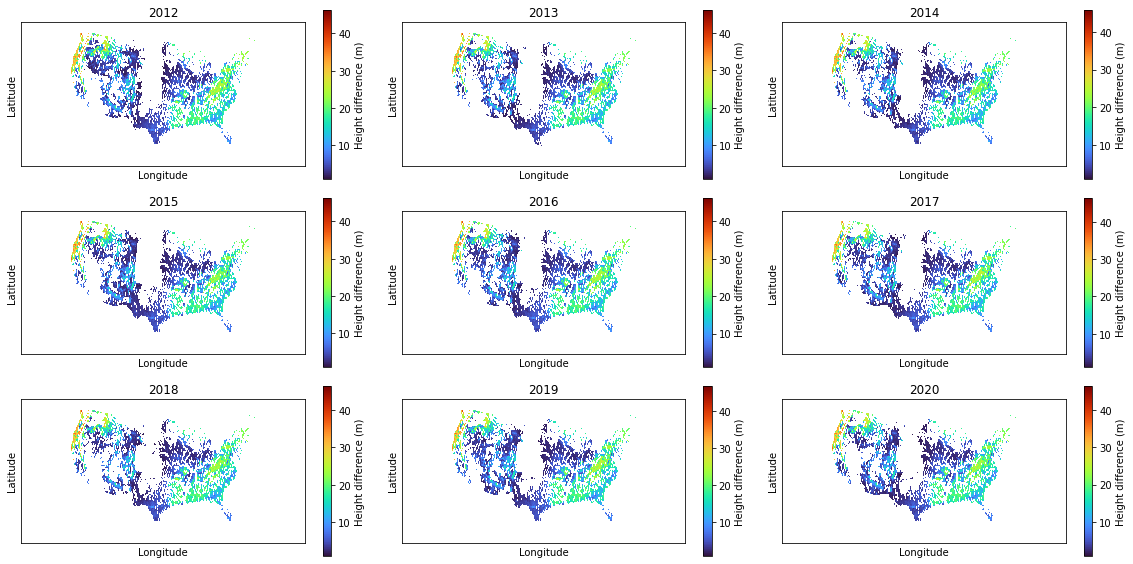

In [3]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

with rasterio.open('H:/2012to2020_global_tree_height/aea_treeHeight_2012_2020_withMask_L48.tif') as src:
    my_tif_array = src.read()

fig, axs = plt.subplots(3, 3, figsize=(16, 8))
for i in range(9):
    year = 2012+i
    image = my_tif_array[i]
    image = np.where(image <= 1, np.nan, image)
    im = axs[i//3, i%3].imshow(image, cmap='turbo')
    axs[i//3, i%3].set_title(f'{year}')
    axs[i//3, i%3].set_xticks([])
    axs[i//3, i%3].set_yticks([])
    axs[i//3, i%3].tick_params(axis='both', which='both', length=0)
    axs[i//3, i%3].set_xlabel('Longitude')
    axs[i//3, i%3].set_ylabel('Latitude')
    axs[i//3, i%3].grid(False)
    cbar = fig.colorbar(im, ax=axs[i//3, i%3])
    cbar.set_label('Height difference (m)')
    
plt.tight_layout()
plt.show()


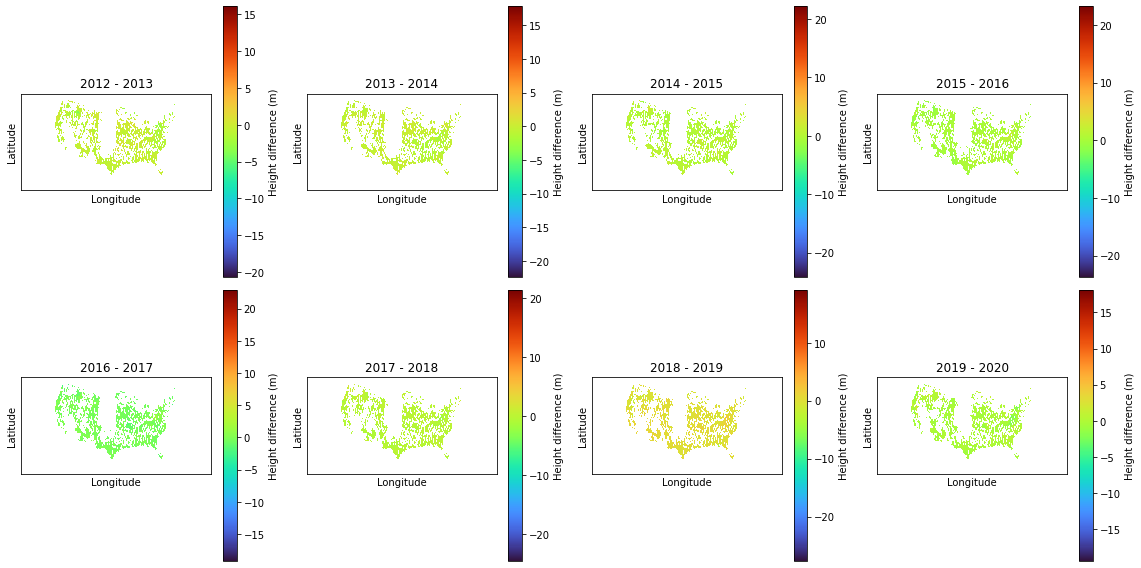

In [2]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

with rasterio.open('H:/2012to2020_global_tree_height/aea_treeHeight_2012_2020_withMask_L48.tif') as src:
    my_tif_array = src.read()

fig, axs = plt.subplots(2, 4, figsize=(16, 8))
for i in range(8):
    year1 = 2012+i
    year2 = 2012+i+1
    image1 = my_tif_array[i]
    image2 = my_tif_array[i+1]
    image1 = np.where(image1 <= 1, np.nan, image1)
    image2 = np.where(image2 <= 1, np.nan, image2)
    image =  image2 - image1
    image = np.where(image == 0, np.nan, image)
    im = axs[i//4, i%4].imshow(image, cmap='turbo')
    axs[i//4, i%4].set_title(f'{year1} - {year2}')
    axs[i//4, i%4].set_xticks([])
    axs[i//4, i%4].set_yticks([])
    axs[i//4, i%4].tick_params(axis='both', which='both', length=0)
    axs[i//4, i%4].set_xlabel('Longitude')
    axs[i//4, i%4].set_ylabel('Latitude')
    axs[i//4, i%4].grid(False)
    cbar = fig.colorbar(im, ax=axs[i//4, i%4])
    cbar.set_label('Height difference (m)')
    
plt.tight_layout()
plt.show()


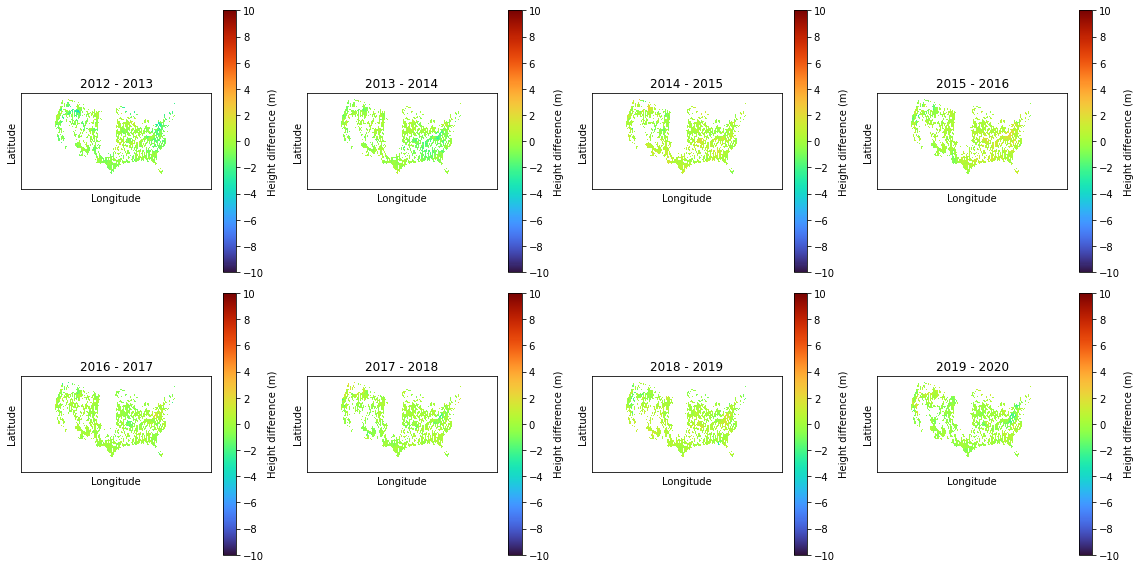

In [3]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

with rasterio.open('H:/2012to2020_global_tree_height/aea_treeHeight_2012_2020_withMask_L48.tif') as src:
    my_tif_array = src.read()

vmin = 10
vmax = -10

fig, axs = plt.subplots(2, 4, figsize=(16, 8))
for i in range(8):
    year1 = 2012+i
    year2 = 2012+i+1
    image1 = my_tif_array[i]
    image2 = my_tif_array[i+1]
    image1 = np.where(image1 <= 1, np.nan, image1)
    image2 = np.where(image2 <= 1, np.nan, image2)
    image =  image2 - image1
    im = axs[i//4, i%4].imshow(image, cmap='turbo', vmin=vmin, vmax=vmax)
    axs[i//4, i%4].set_title(f'{year1} - {year2}')
    axs[i//4, i%4].set_xticks([])
    axs[i//4, i%4].set_yticks([])
    axs[i//4, i%4].tick_params(axis='both', which='both', length=0)
    axs[i//4, i%4].set_xlabel('Longitude')
    axs[i//4, i%4].set_ylabel('Latitude')
    axs[i//4, i%4].grid(False)
    cbar = fig.colorbar(im, ax=axs[i//4, i%4])
    cbar.set_label('Height difference (m)')
    cbar.set_ticks(np.linspace(vmin, vmax, num=11))
    
plt.tight_layout()
plt.show()


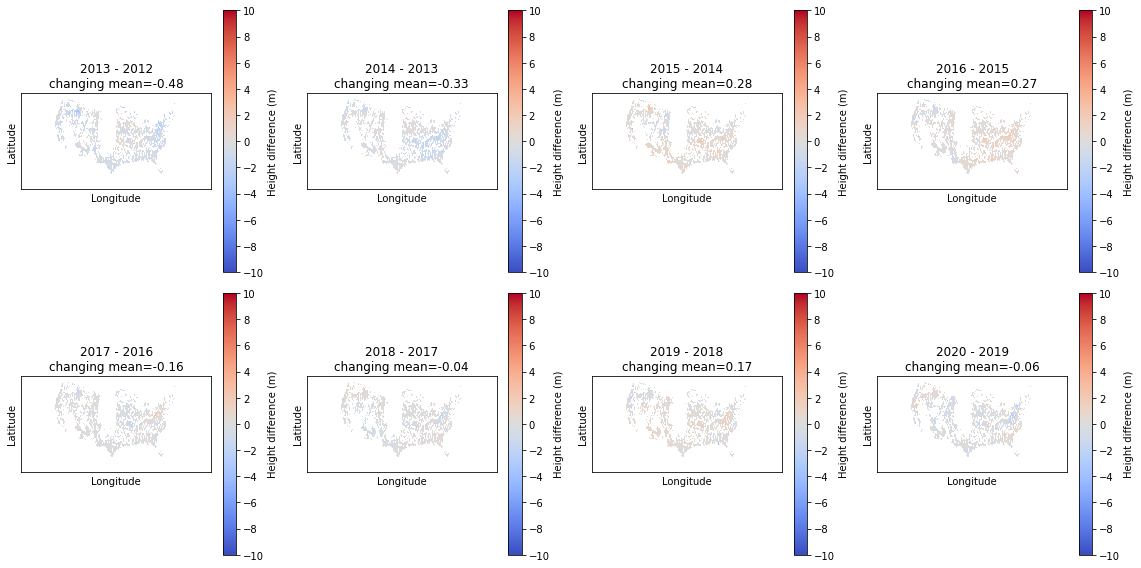

In [4]:
fig, axs = plt.subplots(2, 4, figsize=(16, 8))
for i in range(8):
    year1 = 2012+i
    year2 = 2012+i+1
    image1 = my_tif_array[i]
    image2 = my_tif_array[i+1]
    image1 = np.where(image1 <= 1, np.nan, image1)
    image2 = np.where(image2 <= 1, np.nan, image2)
    image =  image2 - image1
    nonzero_mean = np.nanmean(image[image != 0])
    im = axs[i//4, i%4].imshow(image, cmap='coolwarm', vmin=-10, vmax=10)
    axs[i//4, i%4].set_title(f'{year2} - {year1}\nchanging mean={nonzero_mean:.2f}')
    axs[i//4, i%4].set_xticks([])
    axs[i//4, i%4].set_yticks([])
    axs[i//4, i%4].tick_params(axis='both', which='both', length=0)
    axs[i//4, i%4].set_xlabel('Longitude')
    axs[i//4, i%4].set_ylabel('Latitude')
    axs[i//4, i%4].grid(False)
    cbar = fig.colorbar(im, ax=axs[i//4, i%4])
    cbar.set_label('Height difference (m)')
    cbar.set_ticks(np.linspace(-10, 10, num=11))
    
plt.tight_layout()
plt.show()


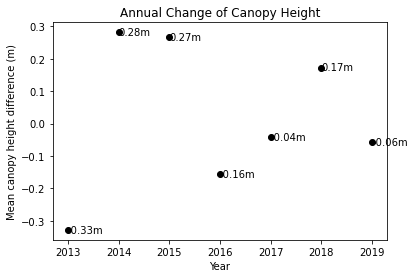

In [5]:
# Calculate the difference between the canopy height of each year and the previous year
diffs = []
for i in range(1, 8):
    image1 = my_tif_array[i]
    image2 = my_tif_array[i+1]
    image1 = np.where(image1 <= 1, np.nan, image1)
    image2 = np.where(image2 <= 1, np.nan, image2)
    diff =  image2 - image1
    diff = np.where(diff == 0, np.nan, diff)
    diffs.append(diff)

# Create a figure with a single subplot
fig, ax = plt.subplots()

# Plot the trend of annual change of the canopy height
for i, diff in enumerate(diffs):
    year1 = 2012+i
    year2 = 2012+i+1
    mean_diff = np.nanmean(diff)
    ax.plot([year2], [mean_diff], marker='o', color='k')
    ax.annotate(f'{mean_diff:.2f}m', (year2, mean_diff),
                ha='left', va='center')

# Set the axis labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Mean canopy height difference (m)')
ax.set_title('Annual Change of Canopy Height')

plt.show()


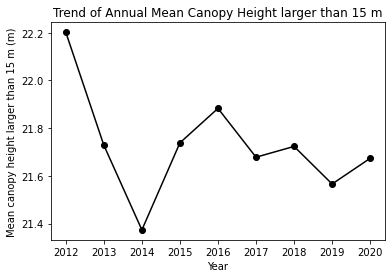

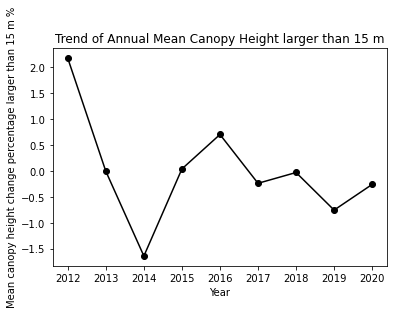

In [10]:
# Calculate the mean canopy height for each year
means = []
for i in range(9):
    image = my_tif_array[i]
    image = np.where(image <= 15, np.nan, image)
    mean_height = np.nanmean(image)
    means.append(mean_height)

# Create a figure with a single subplot
fig, ax = plt.subplots()

# Plot the trend of annual mean canopy height
years = np.arange(2012, 2021)
ax.plot(years, means, marker='o', color='k')

# Set the axis labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Mean canopy height larger than 15 m (m)')
ax.set_title('Trend of Annual Mean Canopy Height larger than 15 m')

plt.show()
# Create another figure with a single subplot
fig, ax = plt.subplots()
# Plot the trend of annual mean canopy height percentage change
ax.plot(years, 100*(means/np.mean(means)-1), marker='o', color='k')

# Set the axis labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Mean canopy height change percentage larger than 15 m %')
ax.set_title('Trend of Annual Mean Canopy Height larger than 15 m')

plt.show()


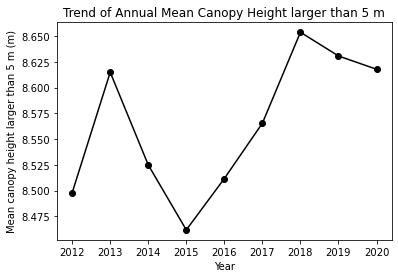

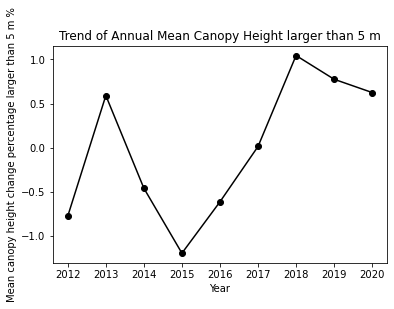

In [11]:
# Calculate the mean canopy height for each year
means = []
for i in range(9):
    image = my_tif_array[i]
    image = np.where(image <= 5, np.nan, image)
    image = np.where(image > 15, np.nan, image)
    mean_height = np.nanmean(image)
    means.append(mean_height)

# Create a figure with a single subplot
fig, ax = plt.subplots()

# Plot the trend of annual mean canopy height
years = np.arange(2012, 2021)
ax.plot(years, means, marker='o', color='k')

# Set the axis labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Mean canopy height larger than 5 m (m)')
ax.set_title('Trend of Annual Mean Canopy Height larger than 5 m')

plt.show()

# Create another figure with a single subplot
fig, ax = plt.subplots()

# Plot the trend of annual mean canopy height percentage change
ax.plot(years, 100*(means/np.mean(means)-1), marker='o', color='k')

# Set the axis labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Mean canopy height change percentage larger than 5 m %')
ax.set_title('Trend of Annual Mean Canopy Height larger than 5 m')

plt.show()


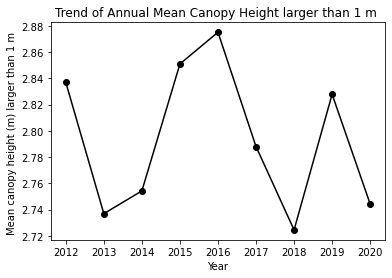

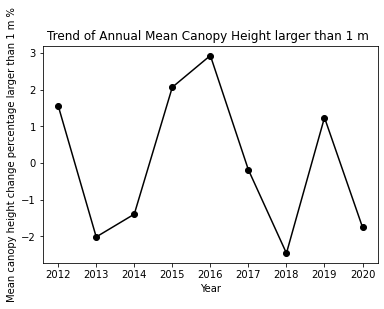

In [12]:
# Calculate the mean canopy height for each year
means = []
for i in range(9):
    image = my_tif_array[i]
    image = np.where(image <= 1, np.nan, image)
    image = np.where(image > 5, np.nan, image)
    mean_height = np.nanmean(image)
    means.append(mean_height)

# Create a figure with a single subplot
fig, ax = plt.subplots()

# Plot the trend of annual mean canopy height
years = np.arange(2012, 2021)
ax.plot(years, means, marker='o', color='k')

# Set the axis labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Mean canopy height (m) larger than 1 m ')
ax.set_title('Trend of Annual Mean Canopy Height larger than 1 m ')

plt.show()

# Create another figure with a single subplot
fig, ax = plt.subplots()

# Plot the trend of annual mean canopy height percentage change
ax.plot(years, 100*(means/np.mean(means)-1), marker='o', color='k')

# Set the axis labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Mean canopy height change percentage larger than 1 m %')
ax.set_title('Trend of Annual Mean Canopy Height larger than 1 m ')

plt.show()


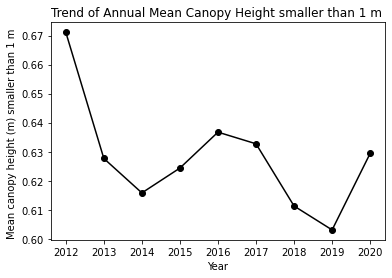

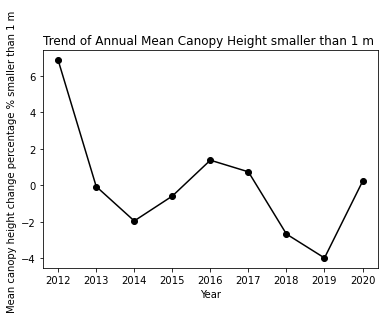

In [13]:
# Calculate the mean canopy height for each year
means = []
for i in range(9):
    image = my_tif_array[i]
    image = np.where(image <= 0, np.nan, image)
    image = np.where(image > 1, np.nan, image)
    mean_height = np.nanmean(image)
    means.append(mean_height)

# Create a figure with a single subplot
fig, ax = plt.subplots()

# Plot the trend of annual mean canopy height
years = np.arange(2012, 2021)
ax.plot(years, means, marker='o', color='k')

# Set the axis labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Mean canopy height (m) smaller than 1 m ')
ax.set_title('Trend of Annual Mean Canopy Height smaller than 1 m ')

plt.show()
# Create another figure with a single subplot
fig, ax = plt.subplots()
# Plot the trend of annual mean canopy height percentage change
ax.plot(years, 100*(means/np.mean(means)-1), marker='o', color='k')

# Set the axis labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Mean canopy height change percentage % smaller than 1 m ')
ax.set_title('Trend of Annual Mean Canopy Height smaller than 1 m ')

plt.show()


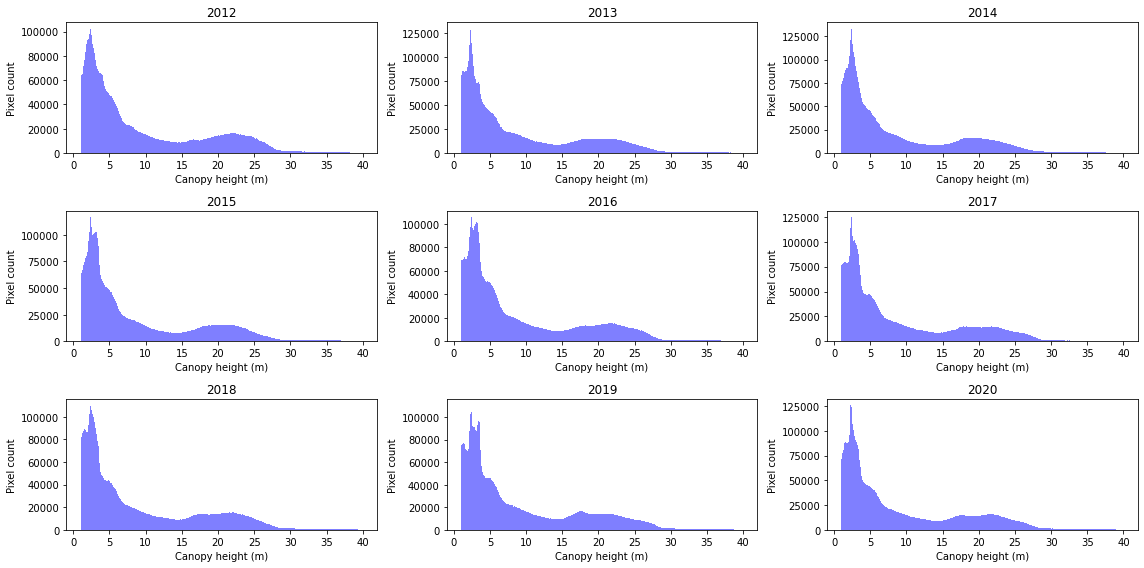

In [14]:
# Create a figure with 9 subplots
fig, axs = plt.subplots(3, 3, figsize=(16, 8))

# Loop over each subplot and plot the histogram for each year
for i in range(9):
    year = 2012+i
    image = my_tif_array[i]
    # Flatten the 2D image array into a 1D array
    values = image.flatten()
    # Remove any NaN values
    values = values[~np.isnan(values)]
    # Plot the histogram
    axs[i//3, i%3].hist(values, bins=500, range=(1, 40), color='b', alpha=0.5)
    axs[i//3, i%3].set_title(f'{year}')
    axs[i//3, i%3].set_xlabel('Canopy height (m)')
    axs[i//3, i%3].set_ylabel('Pixel count')

plt.tight_layout()
plt.show()

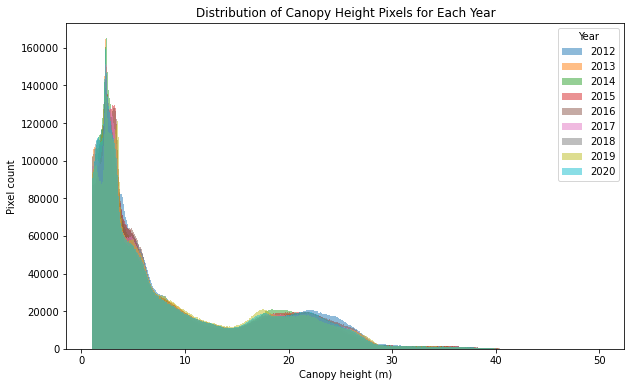

In [15]:
# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Define a colormap
colors = plt.cm.tab10(np.linspace(0, 1, 9))

# Loop over each year and plot the histogram with a different color and alpha value
for i in range(9):
    image = my_tif_array[i]
    # Flatten the 2D image array into a 1D array
    values = image.flatten()
    # Remove any NaN values
    values = values[values>0]
    values = values[~np.isnan(values)]
    # Plot the histogram with a different color and alpha value for each year
    ax.hist(values, bins=500, range=(1, 50), alpha=0.5, color=colors[i], label=f'{2012+i}')
    ax.set_xlabel('Canopy height (m)')
    ax.set_ylabel('Pixel count')

# Add a legend and title
ax.legend(title='Year')
ax.set_title('Distribution of Canopy Height Pixels for Each Year')

plt.show()


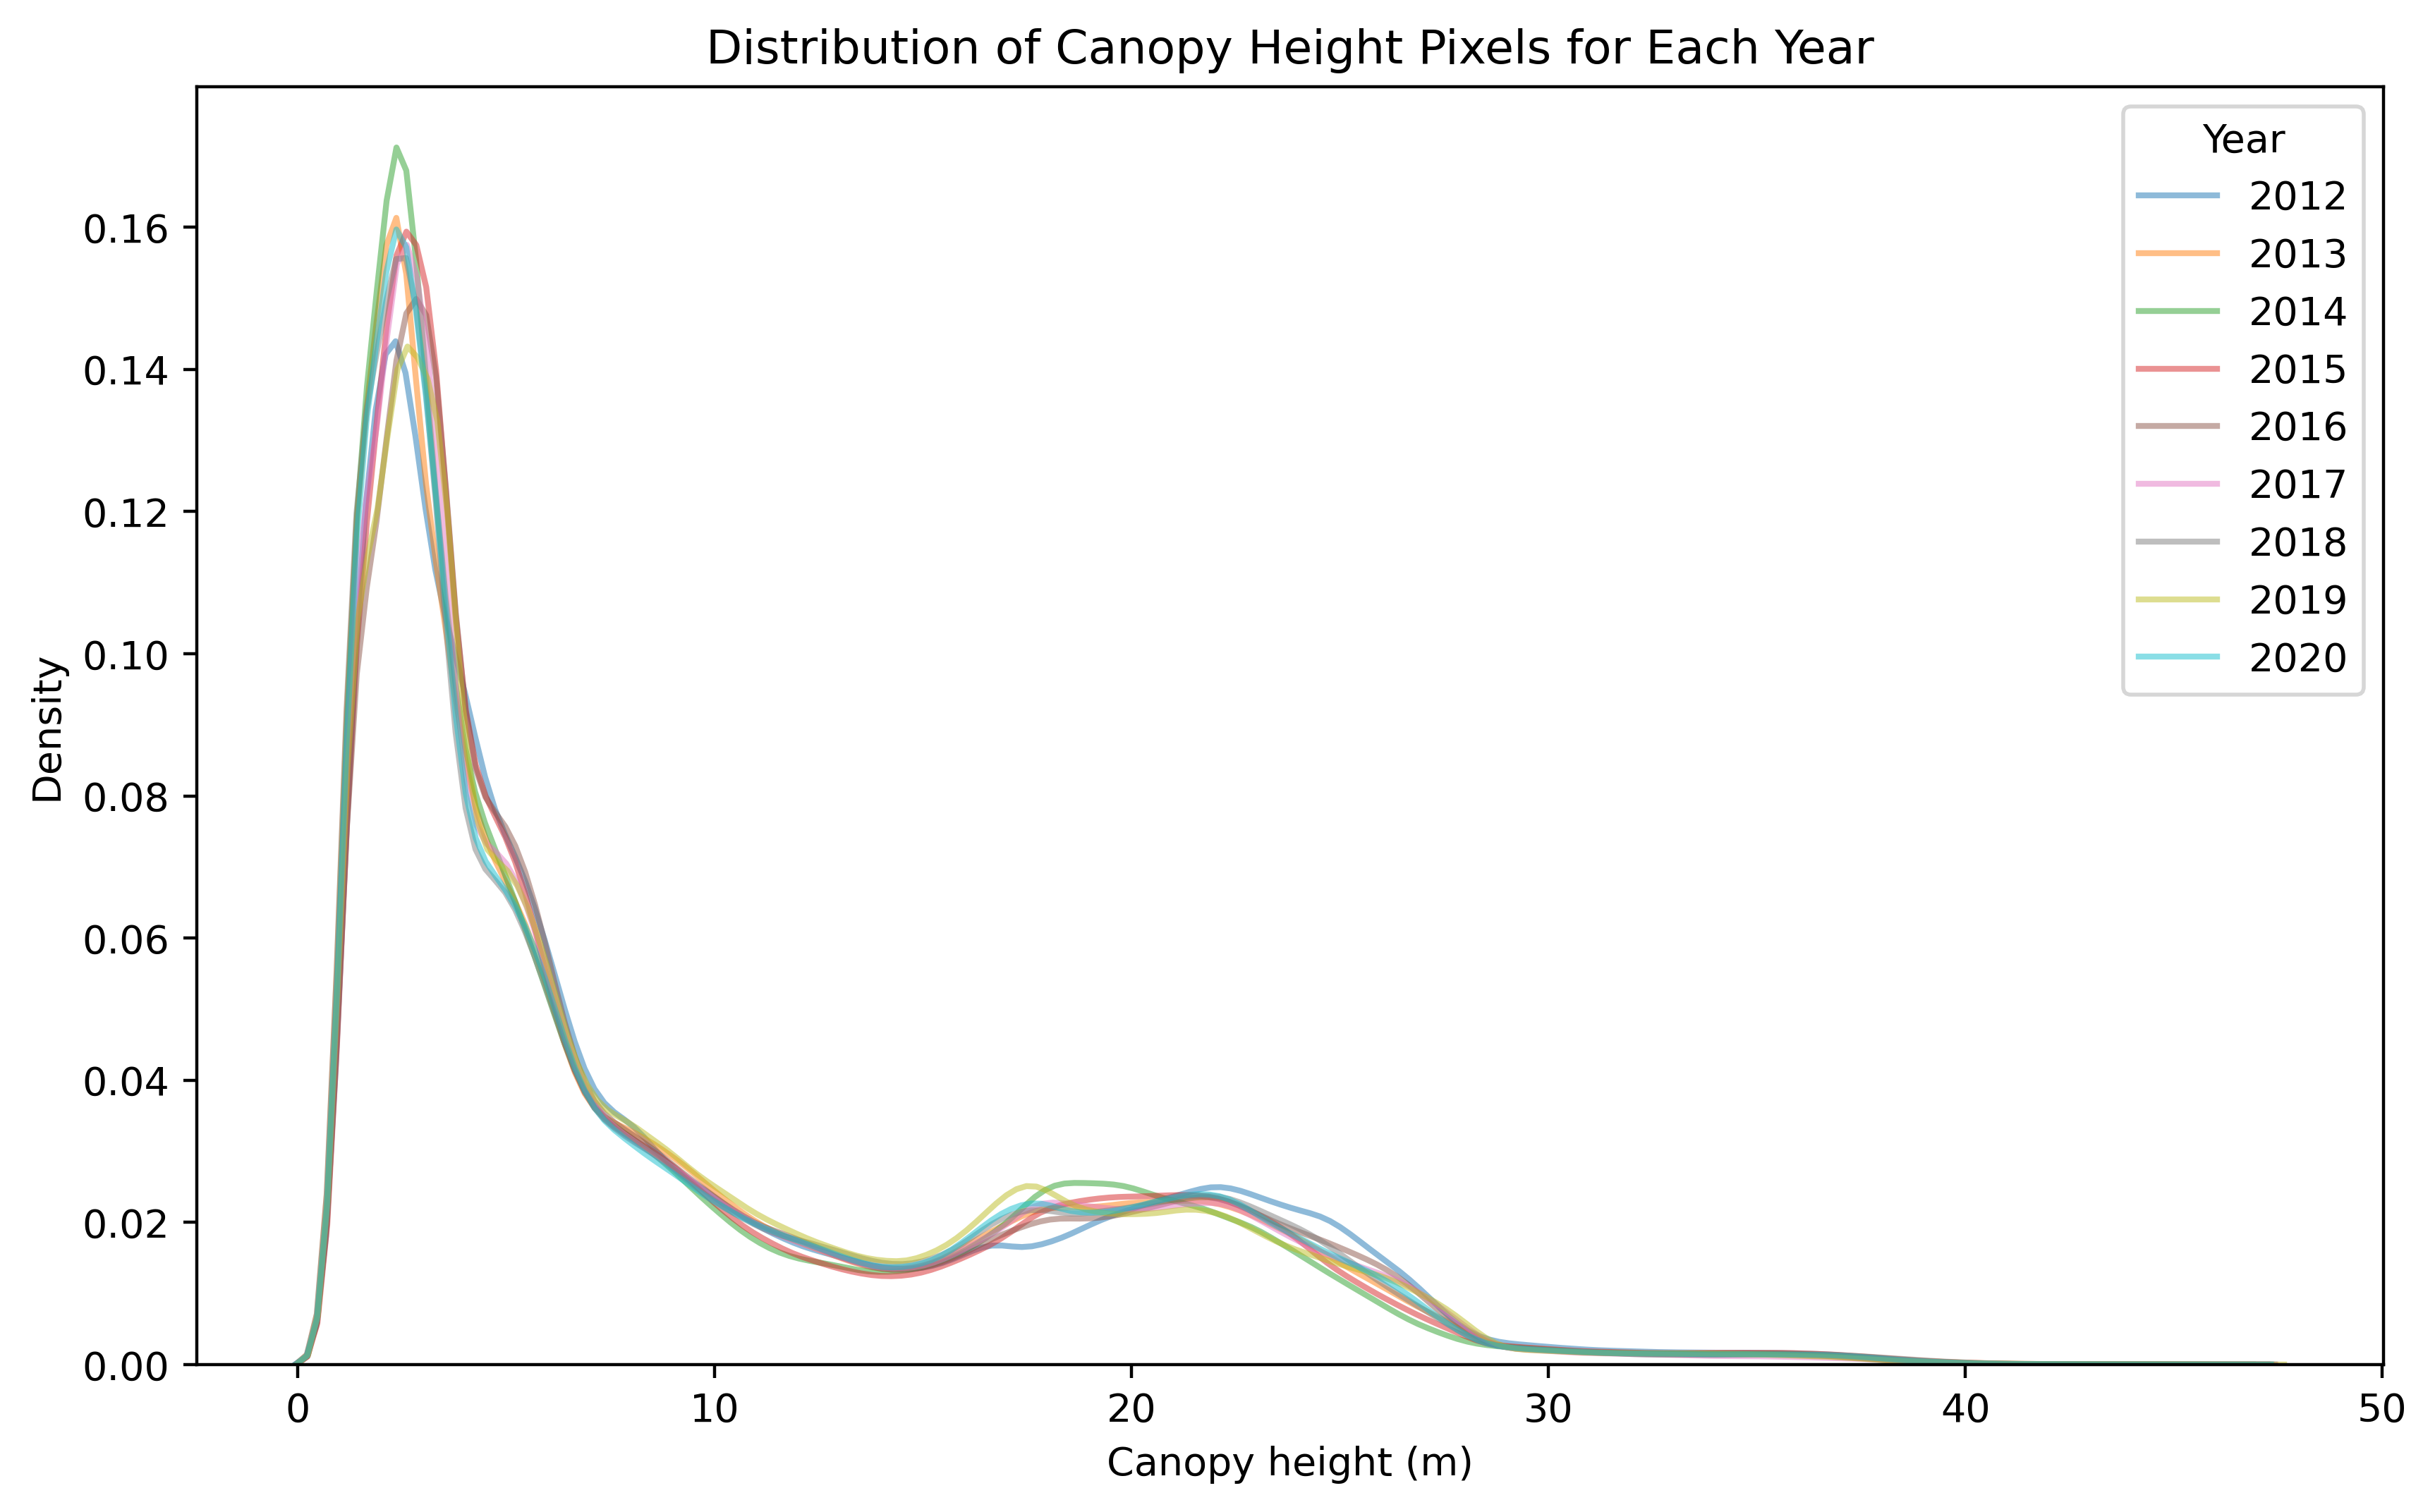

In [17]:
import seaborn as sns

# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(10, 6),dpi=400)

# Define a colormap
colors = plt.cm.tab10(np.linspace(0, 1, 9))

# Loop over each year and plot the density curve with a different color and alpha value
for i in range(9):
    image = my_tif_array[i]
    # Flatten the 2D image array into a 1D array
    values = image.flatten()
    # Remove any NaN values
    values = values[~np.isnan(values)]
    # Plot the density curve with a different color and alpha value for each year
    sns.kdeplot(values, bw_adjust=1, color=colors[i], alpha=0.5, label=f'{2012+i}', ax=ax)

# Add a legend and title
ax.legend(title='Year')
ax.set_xlabel('Canopy height (m)')
ax.set_ylabel('Density')
ax.set_title('Distribution of Canopy Height Pixels for Each Year')

plt.show()
